# P-Controller for air temperature control

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

from pid import PController

plt.style.use("seaborn-v0_8")

In [12]:
horizon = np.arange(0, 100, 1)
set_point = 27.0

p_process_variable = np.zeros(horizon.shape)
p_process_variable[0] = 33.0
inputs = np.zeros(horizon.shape)

In [15]:
inputs

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
print(f"The initial room temperature is {p_process_variable[0]}°C")
print(f"We want to keep the room temperature at {set_point}°C")

The initial room temperature is 33.0°C
We want to keep the room temperature at 27.0°C


In [17]:
p_controller = PController(Kp=0.1)

for i, t in enumerate(horizon):
    pv = p_process_variable[i]    

    u = p_controller.calc_input(set_point, pv)  # k * (sp - pv)
    # disturbance = norm.rvs(0, 0.05)
    inputs[i] = u # + disturbance

    if i < len(p_process_variable) - 1:
        p_process_variable[i + 1] = p_process_variable[i] + inputs[i]

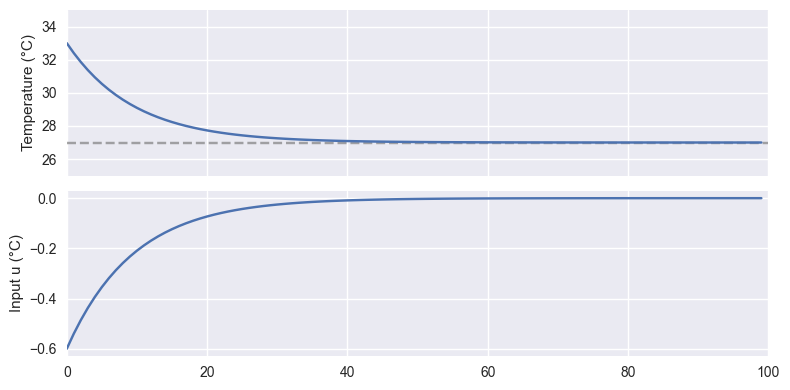

In [18]:
fig, axs = plt.subplots(2, 1, figsize=(8, 4), sharex=True)

# Plot a horizontal gray dashed line for the set point
axs[0].axhline(y=set_point, color="gray", linestyle="--", alpha=0.7)


axs[0].plot(horizon, p_process_variable)
axs[0].set_ylabel("Temperature (°C)")
axs[0].set_ylim(25, 35)
axs[0].set_xlim(0, 100)

axs[1].plot(horizon, inputs)
axs[1].set_ylabel("Input u (°C)")

plt.tight_layout()
plt.show()

# PID

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

from pid import PController, PIController, PIDController

plt.style.use("seaborn-v0_8")

In [2]:
def visualize(horizon, set_points, inputs, process_variable):
    fig, axs = plt.subplots(3, 1, figsize=(8, 4))

    axs[0].plot(horizon, set_points)
    axs[0].set_ylabel("set point value")
    axs[0].set_ylim(-1.5, 1.5)

    axs[1].plot(horizon, inputs)
    axs[1].set_ylabel("input (u)")

    axs[2].plot(horizon, process_variable)
    axs[2].set_ylabel("process variable")
    axs[2].set_ylim(-1.5, 1.5)

    plt.tight_layout()
    plt.show()

In [3]:
horizon = np.arange(0, 100, 1)
set_points = np.zeros(horizon.shape)

set_points[11:30] = 1.0
set_points[51:90] = -1.0

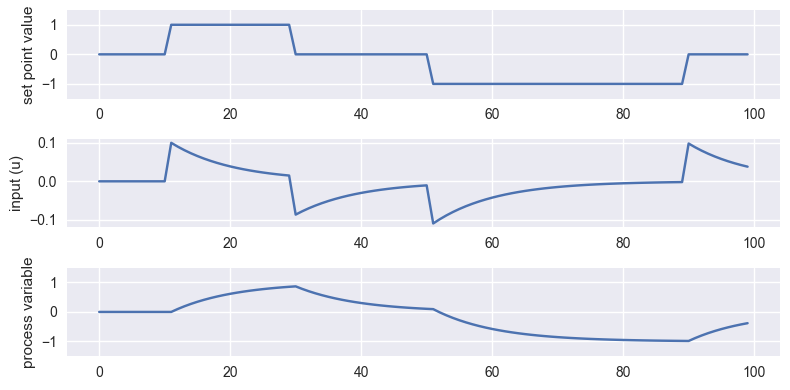

In [4]:
p_process_variable = np.zeros(horizon.shape)
inputs = np.zeros(horizon.shape)
p_controller = PController(Kp=0.1)

for i, t in enumerate(horizon):
    sp = set_points[i]
    pv = p_process_variable[i]

    u = p_controller.calc_input(sp, pv)
    disturbance = norm.rvs(0, 0.05)
    inputs[i] = u #+ disturbance

    if i < len(p_process_variable) - 1:
        p_process_variable[i + 1] = p_process_variable[i] + inputs[i]

visualize(horizon, set_points, inputs, p_process_variable)


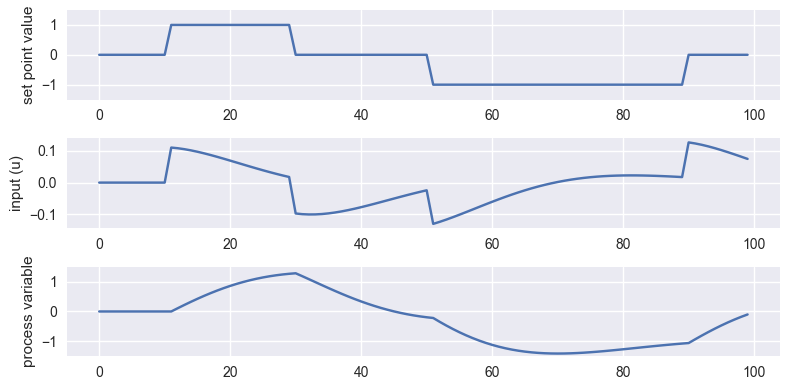

In [5]:
pi_process_variable = np.zeros(horizon.shape)
inputs = np.zeros(horizon.shape)
pi_controller = PIController(Kp=0.1, Ki=0.01)

for i, t in enumerate(horizon):
    sp = set_points[i]
    pv = pi_process_variable[i]

    u = pi_controller.calc_input(sp, pv)
    disturbance = norm.rvs(0, 0.05)
    inputs[i] = u #+ disturbance

    if i < len(pi_process_variable) - 1:
        pi_process_variable[i + 1] = pi_process_variable[i] + inputs[i]

visualize(horizon, set_points, inputs, pi_process_variable)


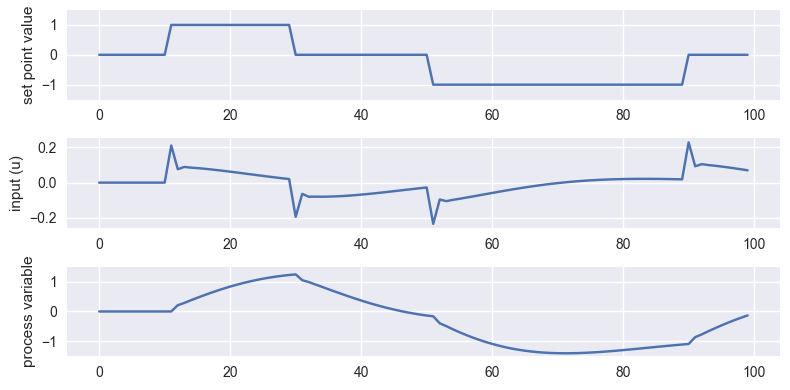

In [6]:
pid_process_variable = np.zeros(horizon.shape)
inputs = np.zeros(horizon.shape)
pid_controller = PIDController(Kp=0.1, Ki=0.01, Kd=0.1)

for i, t in enumerate(horizon):
    sp = set_points[i]
    pv = pid_process_variable[i]

    u = pid_controller.calc_input(sp, pv)
    disturbance = norm.rvs(0, 0.05)
    inputs[i] = u #+ disturbance

    if i < len(pid_process_variable) - 1:
        pid_process_variable[i + 1] = pid_process_variable[i] + inputs[i]

visualize(horizon, set_points, inputs, pid_process_variable)

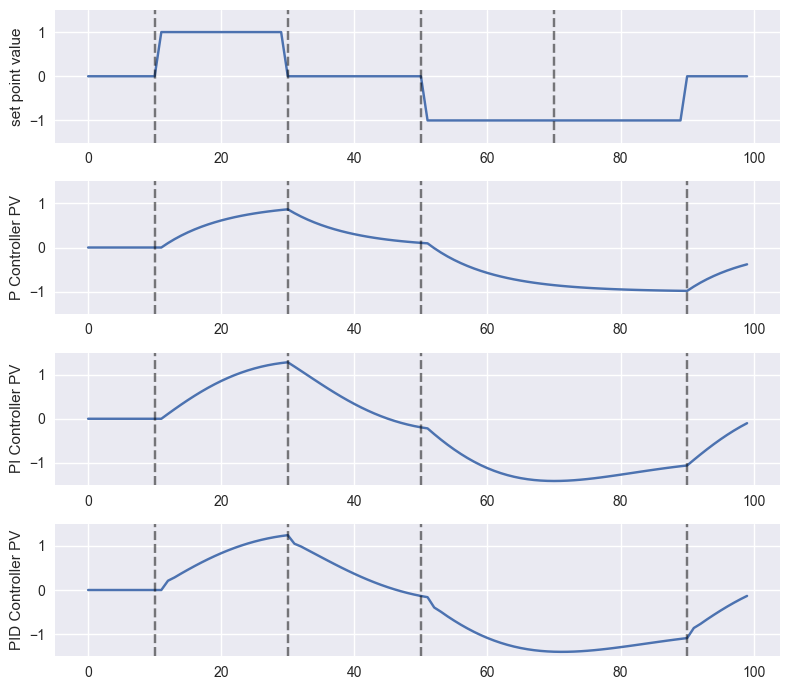

In [7]:
# Plot set value and process variable
fig, ax = plt.subplots(4, 1, figsize=(8, 7))

ax[0].plot(horizon, set_points)
ax[0].set_ylabel("set point value")
ax[0].set_ylim(-1.5, 1.5)
# Draw a vertical line at the point where the set point changes.
for i in [10, 30, 50, 70]:    
    ax[0].axvline(x=i, color="black", linestyle="--", alpha=0.5)

ax[1].plot(horizon, p_process_variable)
ax[1].set_ylabel("P Controller PV")
ax[1].set_ylim(-1.5, 1.5)
for i in [10, 30, 50, 90]:    
    ax[1].axvline(x=i, color="black", linestyle="--", alpha=0.5)

ax[2].plot(horizon, pi_process_variable)
ax[2].set_ylabel("PI Controller PV")
ax[2].set_ylim(-1.5, 1.5)
for i in [10, 30, 50, 90]:    
    ax[2].axvline(x=i, color="black", linestyle="--", alpha=0.5)

ax[3].plot(horizon, pid_process_variable)
ax[3].set_ylabel("PID Controller PV")
ax[3].set_ylim(-1.5, 1.5)
for i in [10, 30, 50, 90]:    
    ax[3].axvline(x=i, color="black", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()